In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-dataset-of-business-levels/salary.csv


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/kaggle/input/salary-dataset-of-business-levels/salary.csv")

In [4]:
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manger,5,110000


In [5]:
df.tail(2)

,Position,Level,Salary
8,C.level,9,250000
9,CEO,10,1000000


In [6]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [7]:
df.drop_duplicates(keep='first',inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [9]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,216500.000000
std,3.02765,285054.088435
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,215000.000000
max,10.00000,1000000.000000


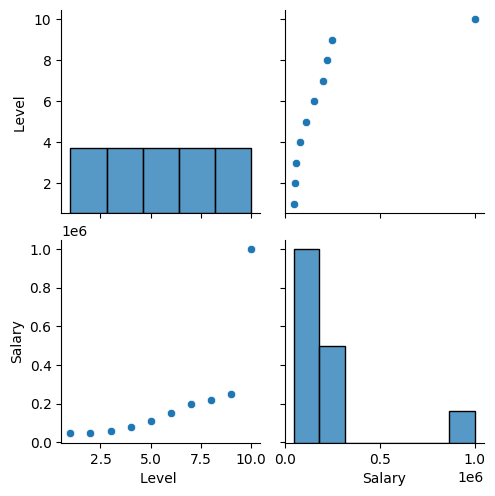

In [10]:
sns.pairplot(df)
plt.show()

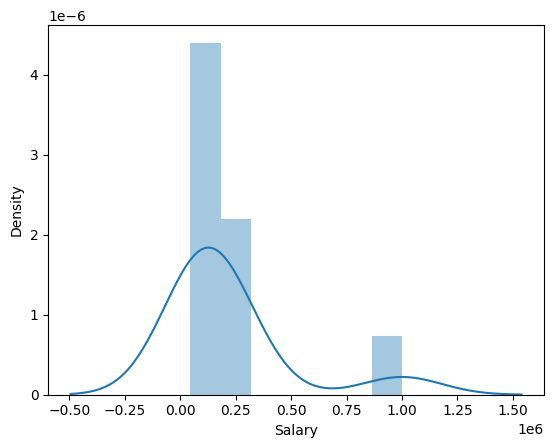

In [11]:
sns.distplot(df['Salary'])
plt.show()

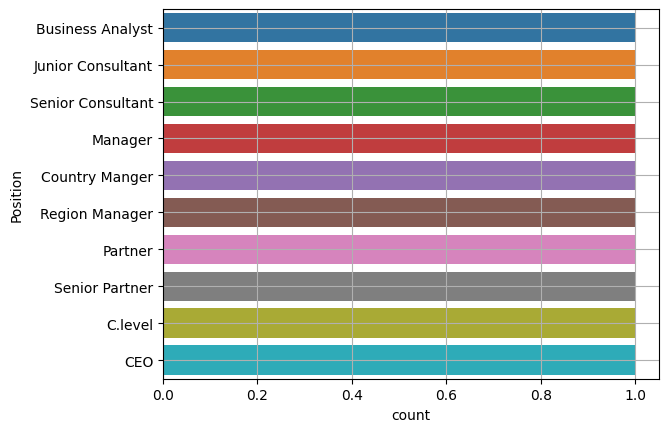

In [12]:
sns.countplot(data=df,y='Position')
plt.grid(True)
plt.show()

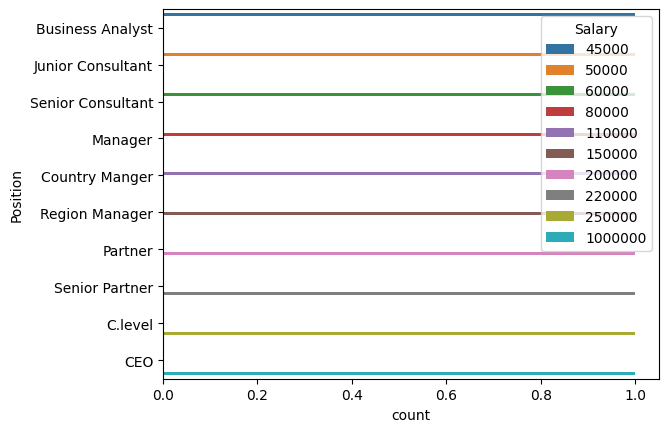

In [13]:
sns.countplot(data=df,y='Position',hue="Salary")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Position']=le.fit_transform(df['Position'])

In [15]:
X=df.iloc[:,:-1]
Y=df['Salary']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [17]:
#Apply StandardScaler on Input X_train, X_test
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [18]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

def mymodel(model):
    
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    
    tr=model.score(X_train,Y_train)
    te=model.score(X_test,Y_test)
    
    mse=mean_squared_error(Y_test,Y_pred)
    r2=r2_score(Y_test,Y_pred)
    
    print(f"\nTraining Score : {tr} \nTesting score :{te}")
    
    print(f"MSE : {mse}\nAccuracy_Scores_R2 {r2}")
    
    return model

In [19]:
from sklearn.linear_model import LinearRegression
mymodel(LinearRegression())


Training Score : 0.9586768416032342 
Testing score :-0.18640156536912533
MSE : 262076105790.03976
Accuracy_Scores_R2 -0.18640156536912533


LinearRegression()

In [20]:
from sklearn.ensemble import GradientBoostingRegressor
mymodel(GradientBoostingRegressor(learning_rate=0.6))


Training Score : 1.0 
Testing score :-0.2741059302852691
MSE : 281450000000.0159
Accuracy_Scores_R2 -0.2741059302852691


GradientBoostingRegressor(learning_rate=0.6)